### Integration under a curve: simple function



#### A simple trigonometric function



Consider the following function:

\begin{equation}
y = 3x + 2\sin(25x) + 2
\end{equation}

The function is easy to integrate but our method would also work for
other functions that are difficult to integrate analytically (see
below):

\begin{equation}
\int ((3/2)x + \sin(25x)) \, 25x = \frac{a}{2}x^2 - \frac{1}{25} \cos(25x)
\end{equation}

Define the function in Python: let's keep the parameters separate for
now - this would make it much easier to modify the curve's behavior:



In [1]:
# Defining the function:
def f(x):
    # compute y from x
    y = 3*x + 2 * np.sin(25*x) + 2
    # create plot label
    label = '3x + 2sin(25x) + 2'
    # return y and plot label
    return y, label

Plot the function:



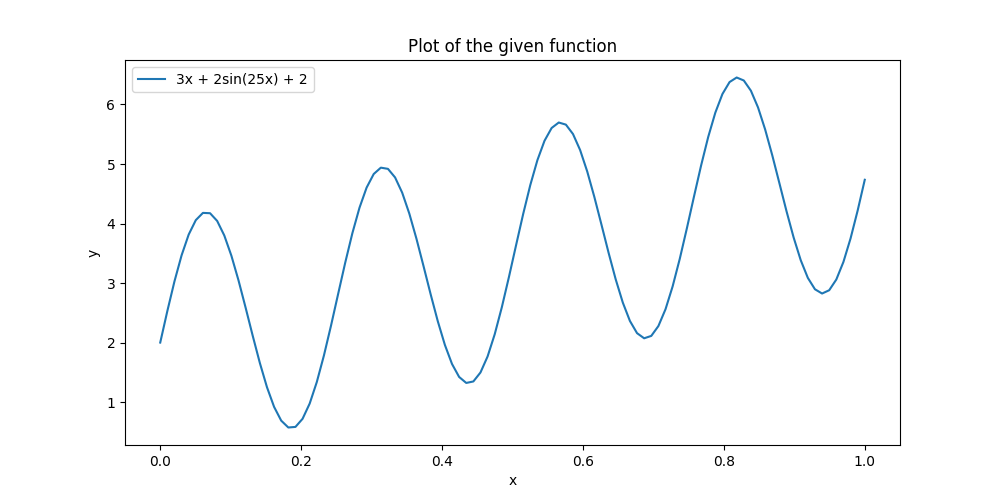

In [1]:
import matplotlib.pyplot as plt

# Define the range for x
x = np.linspace(0, 1, 100)  # Adjusted to the x-axis of the image
y, plot_label = f(x)

# Create the plot
plt.clf()
plt.figure
plt.plot(x, y, label=plot_label)
plt.title('Plot of the given function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.savefig('img/function.png')

#### Monte Carlo integration



To apply Monte Carlo, generate random points, pepper the plane with
them, check which points are below the line, and sum them up.

Generate 100 random vectors: because we know the range of y values,
let's scale them up:



In [1]:
# generate 100 random (x,y) points
xpts = np.random.ranf((100,2))

# y values are in the range 0 to 6.5: scale them up
xpts[:,1] *= 6.5

Plot the random vectors with the curve:



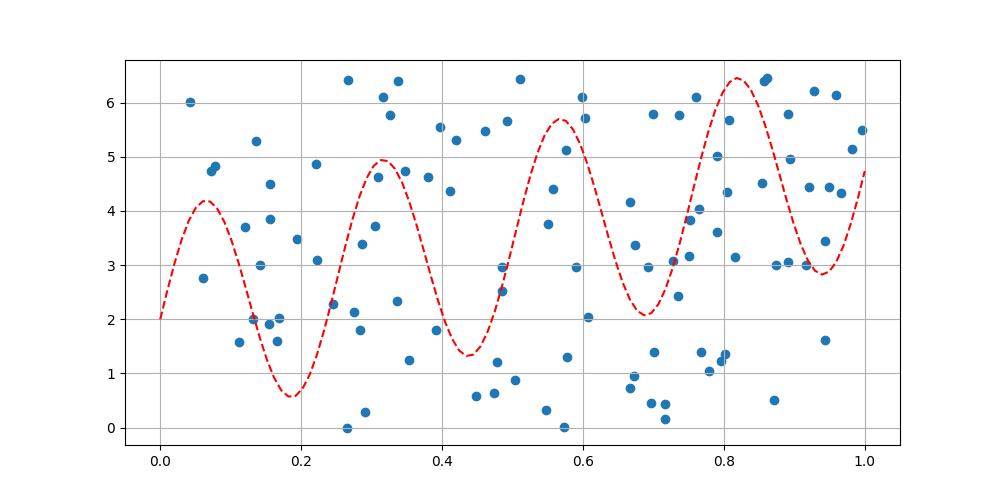

In [1]:
plt.clf()
plt.scatter(xpts[:,0],xpts[:,1])
plt.plot(x, y, color="red",linestyle="dashed")
plt.grid(True)
plt.savefig('img/function1.png')

Now, compute the function for all x and generate a Boolean vector from
the points below the curve:



In [1]:
yline, plot_label = f(xpts[:,0])
area = xpts[:,1] < yline

Summing over the resulting vector gives the total number of points
below the curve:



In [1]:
print(area.sum())

52

Around 50% out of 1000 points are below the line. The average of the
function is a straight line that cuts the figure roughly in half.



#### Plotting challenge



Print the points above the line in color, and the points below the
line with the marker '+'.

Solution:

The random vectors are stored in `xpts`. To print vector subsets, we
have used different x index subsets obtained with the `nonzero`
function, which returns the indices of the array elements that are
non-zero.

The elements that are non-zero are equivalent to the `True` elements if
we check all points for the condition above/below f(x).

In code:



In [1]:
points_below = (xpts[:,1] < yline)
x_below = points_below.nonzero()[0]

-   `x_above` is the vector of indices of points below the line.
-   `xpts[:,1]` is the vector of random y values
-   `yline` is the vector of function values on the curve f(x)
-   `nonzero` extracts `True` values from the Boolean `points_below`
-   `[0]` extracs the x values from the result as an array

Same for the points below: we use the trick of turning the Boolean
into its inverse for the indices of the remaining points:



In [1]:
x_above = (1 - points_below).nonzero()[0]

Now we have all we need to plot both subsets:



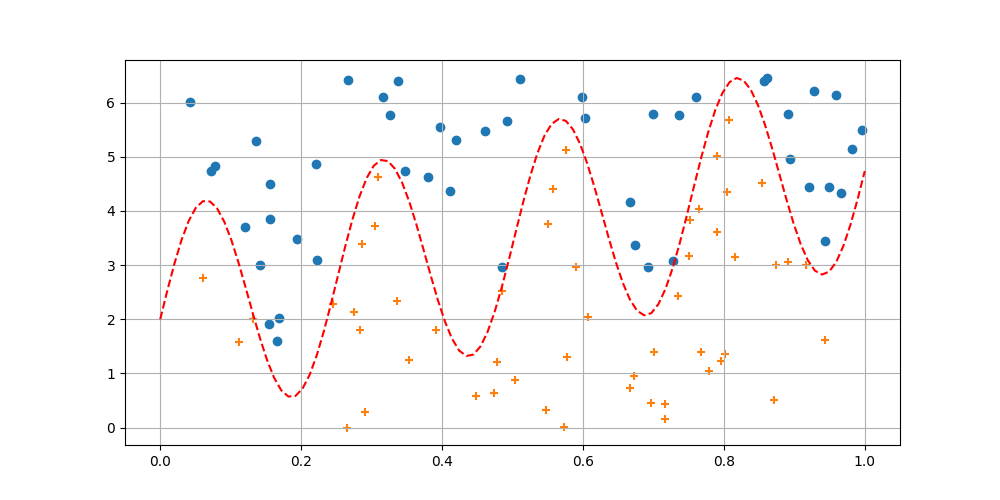

In [1]:
plt.clf()
plt.scatter(xpts[x_above,0],xpts[x_above,1])
plt.scatter(xpts[x_below,0],xpts[x_below,1],marker='+')
plt.plot(x, y, color="red",linestyle="dashed")
plt.grid(True)
plt.savefig('img/function2.png')

### Integration with `scipy` and by hand



Integration with `scipy.integrate.quad`:



In [1]:
from scipy.integrate import quad

# Define the function to integrate
def integrand(x):
    return 3*x + 2 * np.sin(25*x) + 2

# Calculate the area under the curve from x=0 to x=1
result, _ = quad(integrand, 0, 1)

print(result)

3.500703775050922

That's about 50% of the total area 7 x 1 = 7.

Manually: The integral of the function $3x + 2 \sin(25x) + 2$ is:
$$

\begin{align*}
\int (3x + 2 \sin(25x) + 2) \, dx &= \frac{3}{2}x^2 - \frac{2}{25} \cos(25x) + 2x + C
\end{align*}

$$
where $ C $ is the constant of integration.

To find the area under the curve from $ x = 0 $ to $ x = 1 $, evaluate this antiderivative at 1 and 0:
$$

\begin{align*}
\left[ \frac{3}{2}x^2 - \frac{2}{25} \cos(25x) + 2x \right]_{0}^{1} &= \left( \frac{3}{2} \times 1^2 - \frac{2}{25} \cos(25 \times 1) + 2 \times 1 \right) - \left( \frac{3}{2} \times 0^2 - \frac{2}{25} \cos(25 \times 0) + 2 \times 0 \right) \\
&= \frac{3}{2} - \frac{2}{25} \cos(25) + 2 + \frac{2}{25} \approx 3.5
\end{align*}

$$



### Integration under a curve: complex function



#### A complex function



Analytic integration of this function to establish the area under the
curve is not straightforward due to the composition of trigonometric
functions and their powers. Numeric integration is our best bet:

\begin{equation}
y = \left( \sin\left( \left( \cos\left( (x+10) \times 7 \right) \right)^4 \times 8 \right) \right)^2 + \left( \cos\left( (x+10) \times 70 \right) \right)^4 + \exp\left( \frac{x+0.5}{0.9} \right)
\end{equation}

Let's define the function:



In [1]:
# Define the function to plot
def g(x):
    label = 'y = sin(8cos(7(x + 10))^4)^2 + 70cos(x+10)^4+exp((x + 0.5) / 0.9)'
    y = (np.sin((np.cos((x+10)*7))**4*8))**2+(np.cos((x+10)*70))**4+np.exp((x+0.5)/0.9)
    return y, label

To plot, we need to specify a range of x values:



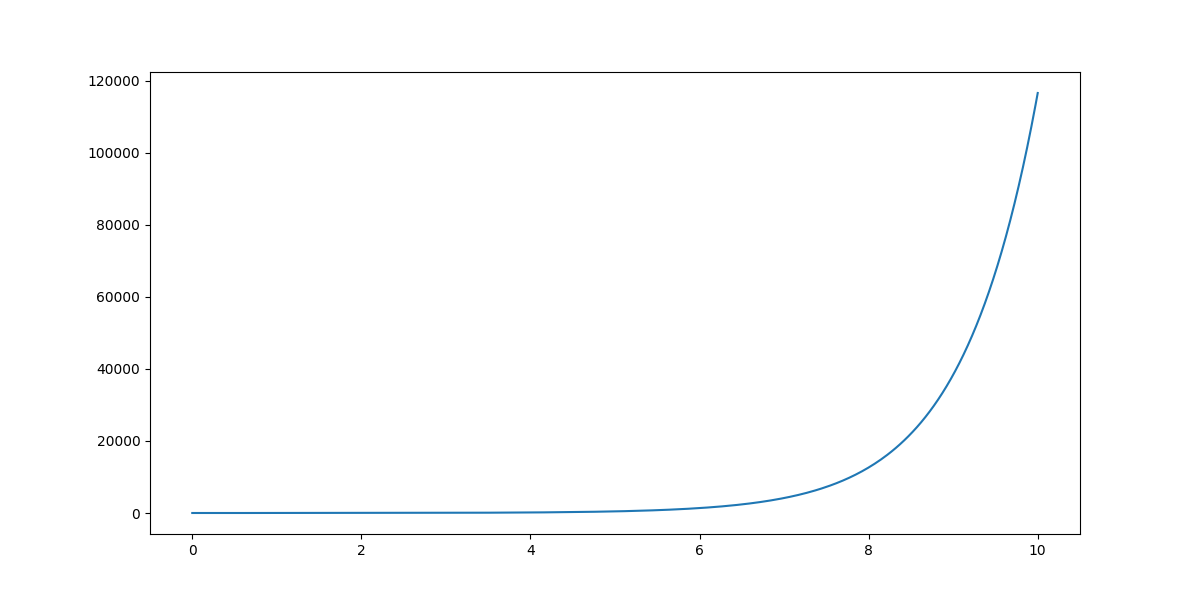

In [1]:
# Create an array of 400 x values from 0 to 10
x = np.linspace(0, 10, 400)

# Generate the y values by applying the function to the x values
y, plot_label = g(x)

# Plot the function
plt.clf()
plt.plot(x, y, label=plot_label)
plt.savefig('img/kinserfunc1.png')

You can see from the result that the oscillations that correspond to
the trigonometric functions are not visible because the exponential
term dominates. To see these oscillations, reduce the display window
to $x\in[0,1]$:



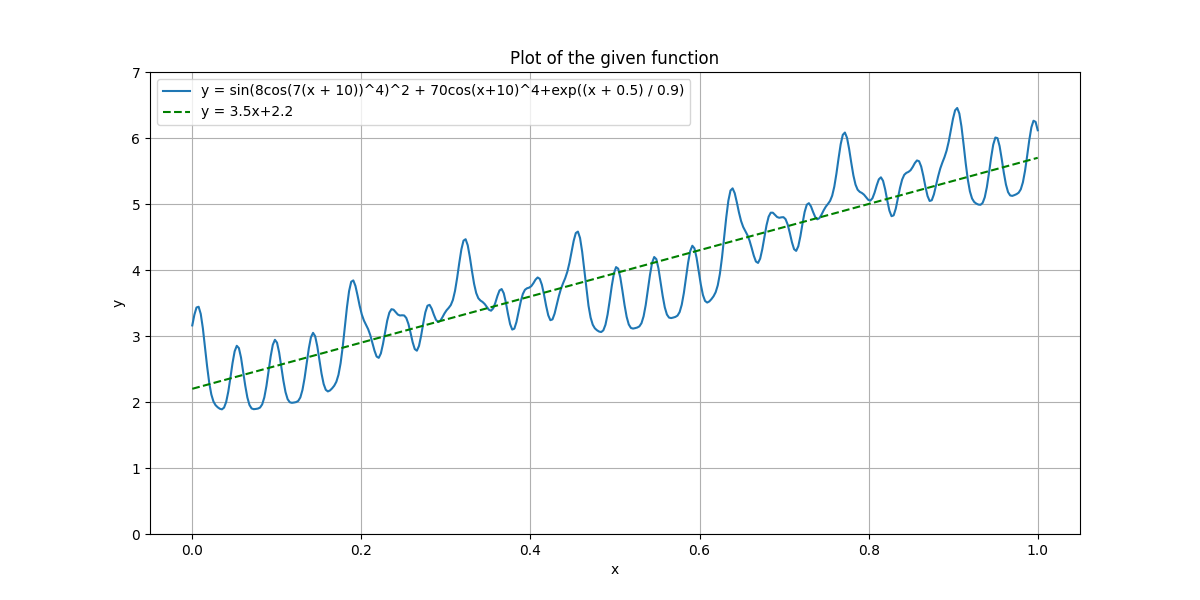

In [1]:
# Create an array of 400 x values from 0 to 1
x = np.linspace(0, 1, 400)

# Generate the y values by applying the function to the x values
y, plot_label = g(x)

# Plot the function
plt.clf()
plt.figure(figsize=(12, 6))
plt.plot(x, y, label=plot_label)
plt.plot(x,3.5*x+2.2, color="green",linestyle="dashed", label='y = 3.5x+2.2')
plt.title('Plot of the given function')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(0,7)
plt.legend()
plt.grid(True)
plt.savefig('img/kinserfunc.png')

#### Monte Carlo integration



Other than using a different function, the code is the same as before:

1.  Create 100 random vectors in [0,1] and scale y values according to
    the y range of the function.
2.  Compute decision surface using random y values and the function.
3.  Create a Boolean vector for the x values of points below the curve.
4.  Sum up the `True` values of the Boolean vector to get the number of
    points below the curve.
5.  Check your calculation by estimating the area under the curve as a
    percentage using averages.
6.  Print points above and below the line together with the curve.

Solution:



In [1]:
# create random points
xpts = np.random.ranf((100,2))

# scale random y values
xpts[:,1] *= 6

# compute decision surface
yline, plot_label = g(xpts[:,0])

# select points below the curve
area = xpts[:,1] < yline

# compute total number of points
print(area.sum())

67

The result hovers around 66% which is in line with the area ratios
when averaging the function as a line f(x) = ax + b for a=3.5 and
b=2.2 (obtained manually, by trying different values).

Let's integrate the area below the line as before:



In [1]:
def f1(x):
    label = 'y = 3.5x+2.2'
    y = 3.5 * x + 2.2
    return y,label

vec1 = np.random.ranf((100,2))
vec1[:,1] *= 6
yline1, label1 = f1(vec1[:,0])
area1 = vec1[:,1] < yline1
print(area1.sum())

: 66

The results are comparable.



#### Iterate the Monte Carlo simulation



Instead of running this code manually, run N simulations of a function
and store the result of each iteration in an array, then average it:



In [1]:
# Define the function to plot
def h(x):
    return (np.sin((np.cos((x+10)*7))**4*8))**2+(np.cos((x+10)*70))**4+np.exp((x+0.5)/0.9)

# define simulation function
def mc(N,M):
    # create empty array for storage
    result = np.zeros(N)
    for i in range(N):
        # create random points
        xpts = np.random.ranf((M,2))
        # scale random y values
        xpts[:,1] *= 6
        # compute decision surface
        yline = h(xpts[:,0])
        # select points below the curve
        area = xpts[:,1] < yline
        # compute total number of points
        result[i] += area.sum()
    # return resulting array          
    return result

Run N = 100,000 simulations and print the average:



In [1]:
N = 10000 # number of iterations
M = 10000 # number of points per iteration
print(f'{100 * mc(N,M).mean()/M:.2f}% of the total area over {N} iterations.')

65.87% of the total area over 10000 iterations.

### How to estimate the area of a square



We turn to 2-dimensional decision surfaces. Our target area is the
lower left quadrant of a 1 x 1 square: it occupies 1/4 of the total
environment, and we expect that one quarter of the total random values
will land inside the target.

![img](./img/square.png "Source: Kinser (2021), p. 33.")

The steps to solve the problem:

1.  Generate 10,000 random points. The space is in [0,1] so you do not
    need to bias or offset the random values.



In [1]:
import numpy as np

# generate 10,000 random points in the plane
vecs = np.random.ranf((10000,2))

print(vecs[0:5])

: [[0.05607057 0.65016287]
   :  [0.30799018 0.65650405]
   :  [0.06966199 0.19762708]
   :  [0.1088712  0.13410477]
   :  [0.25599629 0.4605666 ]]

1.  Determine if a point is inside of the target area or not: $x > 0
       \land x < 0.5 \land y > 0 \land y < 0.5$. Since the random values
    automatically meet the first and third condition, these reduce to:
    All pairs $(x,y)$ for which $x < 0.5 \land y < 0.5$ is `True`.



In [1]:
# store indices for which the condition is True in Boolean variables
xless = vecs[:,0] < 0.5
yless = vecs[:,1] < 0.5

# determine indices for which both conditions hold
both = xless * yless # 0 if either multiplicand is 0, and 1 otherwise
print(both[:5])

# Count number of points in target region by summing
print(both.sum())

: [False False  True  True  True]
   : 2436

This is close to the expected value of 10,000/4 = 2,500 points.



### How to estimate Pi



#### Fun fact



> "In 1998, 17-year-old Colin Percival calculated the 5 trillionth binary
> digit of π. This accomplishment was significant not only because it
> broke a record, but also because it marked the first time such
> calculations were distributed among 25 computers worldwide. The
> project, named PiHex, took 5 months of real time and a year and a half
> of computer time to complete. Percival, who graduated from high school
> in June 1998, had concurrently been attending Simon Fraser University
> in Canada since he was 13." @fermatslibrary ([PiHex](https://wayback.cecm.sfu.ca/projects/pihex/index.html))#+attr<sub>html</sub>: :width 400px
![img](./img/pi.jpg)



#### Environment to estimate $\pi$



Consider a circle inscribed of a square $(x\in[-1,1],y\in[-1,1])$

![img](./img/pisquare.png)

The radius of the circle is 1 and the length of the sides of the
square is 2. We generate random locations inside of the square.

The ratio of the points inside the circle $N_c$ to the total number of
points is the same as the ratio of the areas of the circle $A_c =
\pir^2$ over the area of the square $A_s$.

For $r=1$, therefore $A_c = \pi$, or $N_c/N = \pi/4$, and we obtain
$\pi = 4\frac{N_c}{N}$.

For our decision surface, we use the distance $d=\sqrt{x^2+y^2}$ to
the center of the environment (0,0), therefore if $d<r$, the point is
inside the circle (here $r=1$).

The function $pi_mc$ generates the random points, `vecs`, computes the
distances of each point (x,y) to the center, and evaluate the
condition $d < 1$ and computes an estimate for $\pi$.



In [1]:
import numpy as np
def pi_mc(N,D=2):
    '''Return estimate for Pi

    N: number of random points in [-1,1]
    D: random matrix dimension (default D=2)
    '''
    # create random vectors in a square (x,y) in [-1,1]
    vecs = 2 * np.random.ranf((N,D)) - 1

    # compute distance of random points to center (0,0) sum(1) sums
    # the distances along axis 1 (for each x,y pair) the result is an
    # array (N,) which represents the sum of squares of each row of
    # vecs
    dists = np.sqrt((vecs**2).sum(1))

    # select points inside the circle and sum them up
    N_c = (dists < 1).sum()

    # compute estimate for Pi
    result = 4.0 * N_c / N

    # return result
    return result

Compute Pi with 1 mio random points:



In [1]:
N = 10000000
pi_est = pi_mc(N)
print(f'For {N} randnom points, PI is {pi_est}.')
print(f'A more accurate value is {np.pi}.')

For 10000000 randnom points, PI is 3.1423444.
A more accurate value is 3.141592653589793.